In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import os

#Merging all the months data into a single csv file
files = [file for file in os.listdir('./Sales_Data')]
df = pd.DataFrame()

# Iterate over each CSV file and append its data
for csv_file in files:
    
    file_path = os.path.join('./Sales_Data/', csv_file)
    try:
        # Explicitly specify encoding or handle errors gracefully
        data = pd.read_csv(file_path, encoding='utf-8')
        df = pd.concat([df, data], ignore_index=True)
    except Exception as e:
        print(f"Error reading {csv_file}: {e}")

df.to_csv('year_data.csv', index=False)
df = pd.read_csv('year_data.csv')


#Cleaning the data
df_copy = df.copy()
df_copy = df_copy.dropna()
df_copy = df_copy[df_copy['Order Date'].str[0:2] != 'Or']
df_copy['Order Date'] = pd.to_datetime(df_copy['Order Date'], format="%m/%d/%y %H:%M")
df_copy['Price Each'] = df_copy['Price Each'].astype(float)
df_copy['Quantity Ordered'] = df_copy['Quantity Ordered'].astype(int)

#Adding a month column and a total price column
df_copy['Month'] = df_copy['Order Date'].dt.month
df_copy['Total Price'] = df_copy['Price Each'] * df_copy['Quantity Ordered']

/var/folders/xd/j5xhr_7j5cgb0_0bftl_c4x80000gn/T/ipykernel_20221/2376675177.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicate.loc[:, 'All_products'] = df_duplicate.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


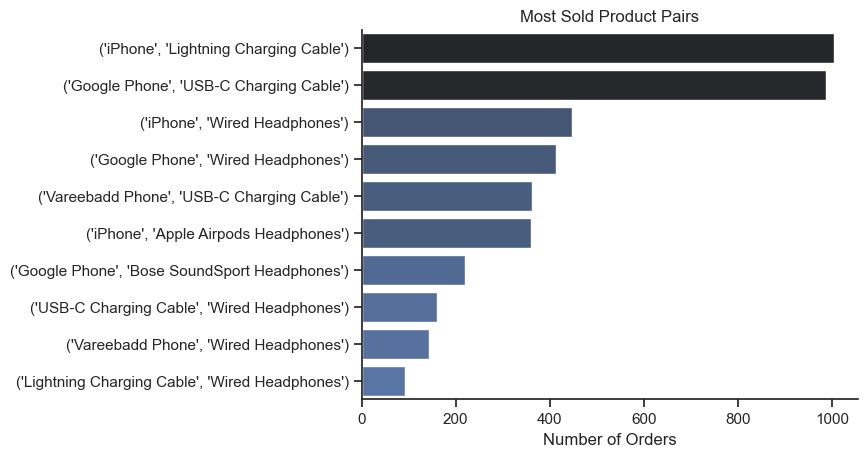

In [2]:
df_copy.reset_index(inplace=True)

#finding the products that are bought together and adding it into the dataframe as a group of products bought together
df_duplicate = df_copy[df_copy.duplicated(subset='Order ID', keep=False)]
df_duplicate.loc[:, 'All_products'] = df_duplicate.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

#now droping the duplicates
df_duplicate = df_duplicate.drop_duplicates(subset='Order ID')

#grouping the products bought together and aggregating the count of how many times they were bought as a pair
from itertools import combinations
from collections import Counter

pair_counts = Counter()

for row in df_duplicate['All_products']:
    row_list = row.split(',')
    pair_counts.update(Counter(combinations(row_list, 2)))

#converting the pair_counts into a dataframe and sorting according to the count
df_pair_counts = pd.DataFrame.from_dict(pair_counts, orient='index', columns=['Count']).reset_index()
df_pair_counts.rename(columns={'index': 'Pairs'}, inplace=True)
df_pair_counts.sort_values(by='Count', ascending=False, inplace=True)

#converting the tuple into string
df_pair_counts = df_pair_counts.head(10)
df_pair_counts['Pairs'] = df_pair_counts['Pairs'].apply(lambda x: str(x))

#plotting the graph
sns.set_theme(style='ticks')
sns.barplot(data=df_pair_counts, x='Count', y='Pairs', hue='Count', palette='dark:b_r', legend=False)
plt.title('Most Sold Product Pairs')
plt.xlabel('Number of Orders')
plt.ylabel('')
sns.despine()
plt.show()
